In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing dataset
dataset=pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:,3:13] #input features - independent features, not using "row number, custid and surname"
y = dataset.iloc[:,-1] #output - independent features

In [3]:
#creating dummy variables for categorical features
geography = pd.get_dummies(X["Geography"]) #have 3 variables in this category so not dropping first column
gender = pd.get_dummies(X["Gender"], drop_first = True) #have 2 variables in this category so dropping isnt a problem

In [4]:
#concatenating categorical varaibles(dataframes) with dataset
X = pd.concat([X,geography,gender],axis=1)

In [5]:
#dropping original columns(unnecessary since we concatenated categorical)
X = X.drop(['Geography','Gender'],axis=1)

In [6]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [7]:
#feature scaling(similar to normalizing)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.


In [9]:
#initialising the ANN
classifier = Sequential()

In [10]:
#adding input layer and first hidden layer
#classifier.add(Dense(output_dim = 6, init = 'he_uniform', activation='relu', input_dim = 11)) ---> keras 1.0
classifier.add(Dense(units=6, activation="relu", input_dim=12, kernel_initializer="he_uniform")) # so ip layer has 12 neurons and first hidden layer has 6 hidden neurons

In [11]:
#adding second hidden layer
classifier.add(Dense(units=6, kernel_initializer = 'he_uniform', activation = 'relu'))

In [12]:
#adding output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [13]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [14]:
#compiling the ANN
classifier.compile(optimizer= 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
#fitting the ANN to the training set
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, nb_epoch = 100)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 128us/step - loss: 0.6561 - accuracy: 0.6320 - val_loss: 0.5052 - val_accuracy: 0.7955
Epoch 2/100
5359/5359 [==============================] - 1s 106us/step - loss: 0.4839 - accuracy: 0.7962 - val_loss: 0.4802 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 1s 102us/step - loss: 0.4642 - accuracy: 0.7962 - val_loss: 0.4634 - val_accuracy: 0.7955
Epoch 4/100
5359/5359 [==============================] - 1s 104us/step - loss: 0.4477 - accuracy: 0.7964 - val_loss: 0.4484 - val_accuracy: 0.7978
Epoch 5/100
5359/5359 [==============================] - ETA: 0s - loss: 0.4310 - accuracy: 0.80 - 1s 103us/step - loss: 0.4319 - accuracy: 0.8037 - val_loss: 0.4360 - val_accuracy: 0.8069
Epoch 6/100
5359/5359 [==============================] - 1s 102us/step - loss: 0.4186 - accuracy: 0.8097 - val_loss: 0.4260 - val_accuracy: 0.8092
Epoch 7/100
5359/5359 [====

5359/5359 [==============================] - 1s 105us/step - loss: 0.3366 - accuracy: 0.8621 - val_loss: 0.3622 - val_accuracy: 0.8523
Epoch 54/100
5359/5359 [==============================] - 1s 100us/step - loss: 0.3361 - accuracy: 0.8617 - val_loss: 0.3624 - val_accuracy: 0.8531
Epoch 55/100
5359/5359 [==============================] - 1s 98us/step - loss: 0.3362 - accuracy: 0.8627 - val_loss: 0.3619 - val_accuracy: 0.8523
Epoch 56/100
5359/5359 [==============================] - 1s 96us/step - loss: 0.3364 - accuracy: 0.8628 - val_loss: 0.3616 - val_accuracy: 0.8535
Epoch 57/100
5359/5359 [==============================] - 1s 98us/step - loss: 0.3361 - accuracy: 0.8642 - val_loss: 0.3616 - val_accuracy: 0.8546
Epoch 58/100
5359/5359 [==============================] - 1s 97us/step - loss: 0.3357 - accuracy: 0.8636 - val_loss: 0.3617 - val_accuracy: 0.8531
Epoch 59/100
5359/5359 [==============================] - ETA: 0s - loss: 0.3354 - accuracy: 0.86 - 1s 103us/step - loss: 0.3360 

In [16]:
#list all data in history
print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


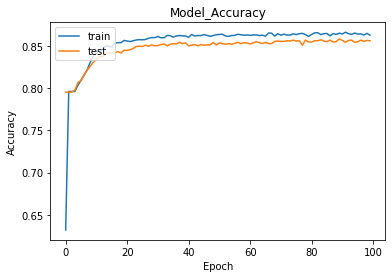

In [17]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

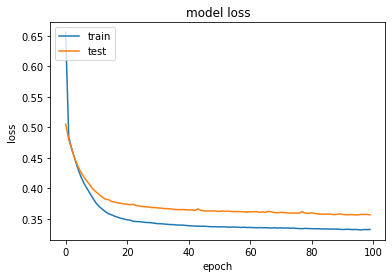

In [18]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
# making the predictions and evaluating the model

In [20]:
#Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5

In [21]:
# creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1522,   73],
       [ 206,  199]], dtype=int64)

In [22]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.8605